In [1]:
# import liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked','Survived']
df = df[features]
df.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Survived
0       3    male  22.0      1      0   7.2500        S         0
1       1  female  38.0      1      0  71.2833        C         1
2       3  female  26.0      0      0   7.9250        S         1
3       1  female  35.0      1      0  53.1000        S         1
4       3    male  35.0      0      0   8.0500        S         0

#### Details of the features
- Pclass (Passenger Class): Categorical/Ordinal; indicates the class of ticket (1st, 2nd, or 3rd), with 1st being most luxurious and 3rd least.
- Sex: Categorical; passenger's gender (male or female).
- Age: Numerical (Continuous); passenger's age in years (often with missing values).
- SibSp (Siblings/Spouses): Numerical (Discrete); number of siblings or spouses a passenger had on board.
- Parch (Parents/Children): Numerical (Discrete); number of parents or children a passenger had on board.
- Fare: Numerical (Continuous); the amount of money paid for the ticket.
- Embarked: Categorical; the port from which the passenger boarded (C=Cherbourg, Q=Queenstown, S=Southampton).
- Survived: Target/Binary; indicates if the passenger survived the disaster (0 = No, 1 = Yes). 

In [5]:
df.shape

(891, 8)

In [6]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64

In [7]:
# drop null values
df.dropna(inplace=True)
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

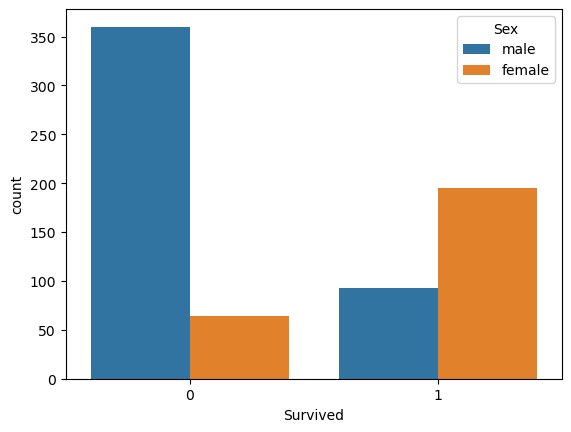

In [8]:
# plot between survive and the sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.show()

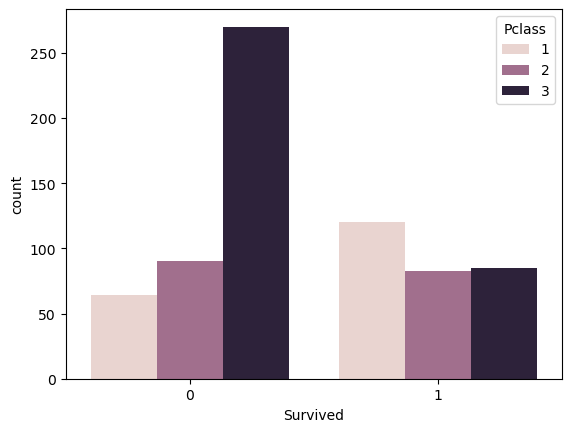

In [9]:
# plot between survive and the pclass
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.show()

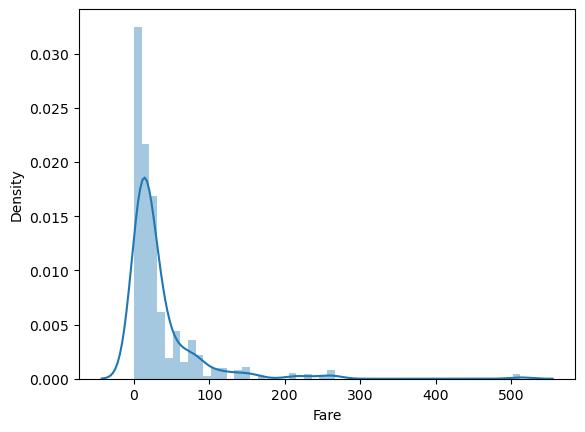

In [10]:
# distplot on fare
sns.distplot(df['Fare'])
plt.show()

###### Define Preprocessing Steps with pipeline

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [13]:
num_features = ['Pclass','Age', 'SibSp', 'Parch', 'Fare']
cat_features = ['Sex', 'Embarked']

# Define transformers
num_transformer = StandardScaler()  # Standardization for numerical features
cat_transformer = OneHotEncoder()  # One-hot encoding for categorical features

In [14]:
# Combine transformers into a preprocessor
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

####  Split the data for training and Testing

In [15]:
X = df.drop('Survived', axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((569, 7), (143, 7), (569,), (143,))

#### Build and Train model

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [17]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Data transformation
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # ML model
])

# Train the model
pipeline.fit(X_train, y_train)
print("Model training complete!")

Model training complete!


In [18]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [19]:
from sklearn.metrics import accuracy_score

# Make predictions
y_pred = pipeline.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 76.22


####  Save and Load the Model

In [20]:
import joblib

# Save the trained pipeline
joblib.dump(pipeline, 'ml_pipeline.pkl')

# Load the model
loaded_pipeline = joblib.load('ml_pipeline.pkl')

# Predict using the loaded model
sample_data = pd.DataFrame([{'Pclass': 3, 'Sex': 'female', 'Age': 25, 'SibSp': 0, 'Parch': 0, 'Fare': 7.5, 'Embarked': 'S'}])
prediction = loaded_pipeline.predict(sample_data)
print(f"Prediction: {'Survived' if prediction[0] == 1 else 'Did not Survive'}")

Prediction: Survived


### Applying individual model on pipeline

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [23]:
models = {"Decision Tree": DecisionTreeClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "Support Vector Machine": SVC(probability=True)}

for name, model in models.items():
    pipe = Pipeline([
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_train)
    print(name,":::", round(accuracy_score(y_train, pred)*100))


ValueError: could not convert string to float: 'female'

### VotingClassifier by ensemble learning

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier()),
        ('lr', LogisticRegression()),
        ('svm', SVC(probability=True)),
        ('rf', RandomForestClassifier())
    ],
    voting='soft'   # soft voting uses probabilities
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', voting_clf)
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('classifier',
                 VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                                              ('lr', LogisticRegression()),
                                              ('svm', SVC(probability=True)),
                                              ('rf', RandomForestClassifier())],
                                  voting='soft'))])

In [ ]:
pipeline.score(X_test, y_test)

0.7832167832167832

### gET THE BEST MODEL by gRIDsEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier': [
        DecisionTreeClassifier(),
        LogisticRegression(),
        SVC(),
        RandomForestClassifier()
    ]
}

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())  # placeholder, will be replaced
])

grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Model:", grid.best_estimator_)
print("Best Score:", grid.best_score_)
print("Best Parameters:", grid.best_params_)


Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', SVC())])
Best Score: 0.8102158049992237
Best Parameters: {'classifier': SVC()}


In [ ]:
# SAVE GRIDSEARCH MODEL
joblib.dump(grid.best_estimator_, 'gridsearch_model.pkl')

['gridsearch_model.pkl']

In [ ]:
#USE GRIDSEARCH MODEL
gridsearch_model = joblib.load('gridsearch_model.pkl')
gridsearch_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', SVC())])

In [ ]:
# Predict using the loaded model
sample_data = pd.DataFrame([{'Pclass': 3, 'Sex': 'female', 'Age': 25, 'SibSp': 0, 'Parch': 0, 'Fare': 7.5, 'Embarked': 'S'}])
prediction = gridsearch_model.predict(sample_data)
print(f"Prediction: {'Survived' if prediction[0] == 1 else 'Did not Survive'}")

Prediction: Survived
